In [2]:
# from PyEMD import EMD
import segyio
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

In [3]:
# seismic_sgy = '/Users/stevejpurves/dev/euclidity/data/f3/f3_seismic.sgy'
seismic_sgy = '/Users/stevejpurves/dev/hack_cph2018/rgb-explorers/seismic subcrop/F03_Subcrop_around_F02-01.sgy'
print(seismic_sgy)
with segyio.open(seismic_sgy,'r') as f:
    trace = f.trace[500]

/Users/stevejpurves/dev/hack_cph2018/rgb-explorers/seismic subcrop/F03_Subcrop_around_F02-01.sgy


In [4]:
help(plt.ylim)

Help on function ylim in module matplotlib.pyplot:

ylim(*args, **kwargs)
    Get or set the y-limits of the current axes.
    
    Call signatures::
    
        ymin, ymax = ylim()  # return the current ylim
        ylim((ymin, ymax))   # set the ylim to ymin, ymax
        ylim(ymin, ymax)     # set the ylim to ymin, ymax
    
    If you do not specify args, you can alternatively pass *ymin* or *ymax* as
    kwargs, i.e.::
    
        ylim(ymax=3)  # adjust the max leaving min unchanged
        ylim(ymin=1)  # adjust the min leaving max unchanged
    
    Setting limits turns autoscaling off for the y-axis.
    
    Returns
    -------
    ymin, ymax
        A tuple of the new y-axis limits.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``ylim()``) is the pyplot
    equivalent of calling `~.Axes.get_ylim` on the current axes.
    Calling this function with arguments is the pyplot equivalent of calling
    `~.Axes.set_ylim` on the current axes. All argume

/Users/stevejpurves/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


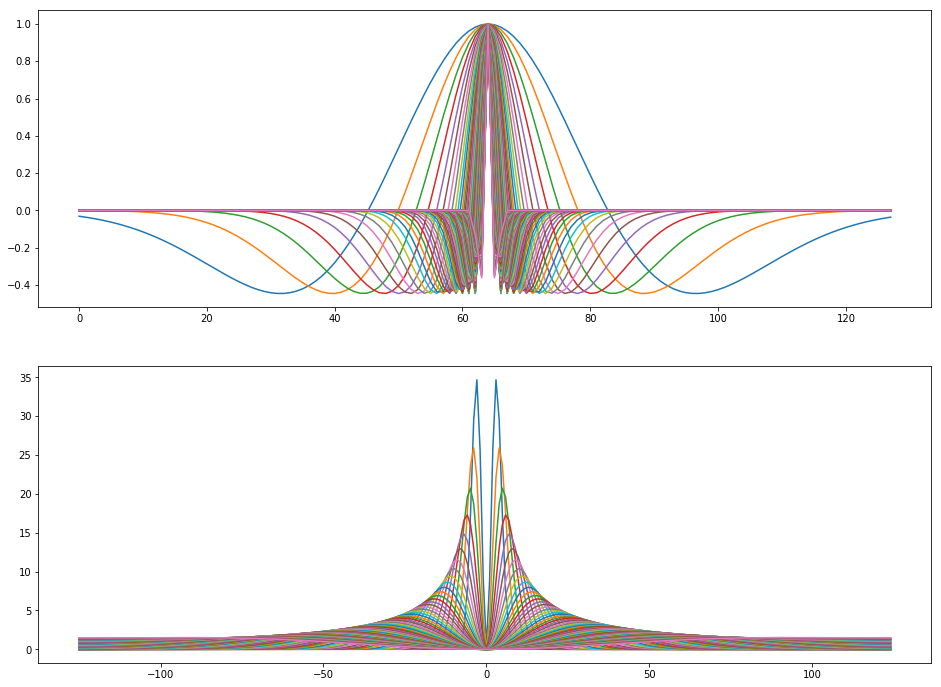

In [65]:
from scipy.signal import cwt, morlet
from bruges import filters
from scipy import signal
import numpy as np
from numpy import fft

Fc = np.arange(3, 80)

for fc in Fc:
    w = filters.ricker(f=fc, duration=0.512, dt=0.004)
    F = fft.fftshift(250*fft.fftfreq(256))
    W = fft.fftshift(fft.fft(np.real(w), 256))
    
    Wpos = np.abs(W[:129])
    the_max = F[127 + np.argmax(np.abs(W[:129]))]
    
    plt.subplot(2,1,1)
    plt.plot(np.real(w))
    plt.subplot(2,1,2)
    plt.plot(F,np.abs(W))

In [66]:
# cwt_tf = cwt(trace, ricker, widths)

def ricker_expansion(trace, Fc):
    expansion = np.zeros((len(trace), len(Fc)))
    for i, fc in enumerate(Fc):
        w = filters.ricker(f=fc, duration=0.512, dt=0.004)
        bandpass = np.squeeze(np.convolve(w, trace, mode='same'))
        expansion[:, i-1] = bandpass
    return expansion
    
E = ricker_expansion(trace, Fc)

77


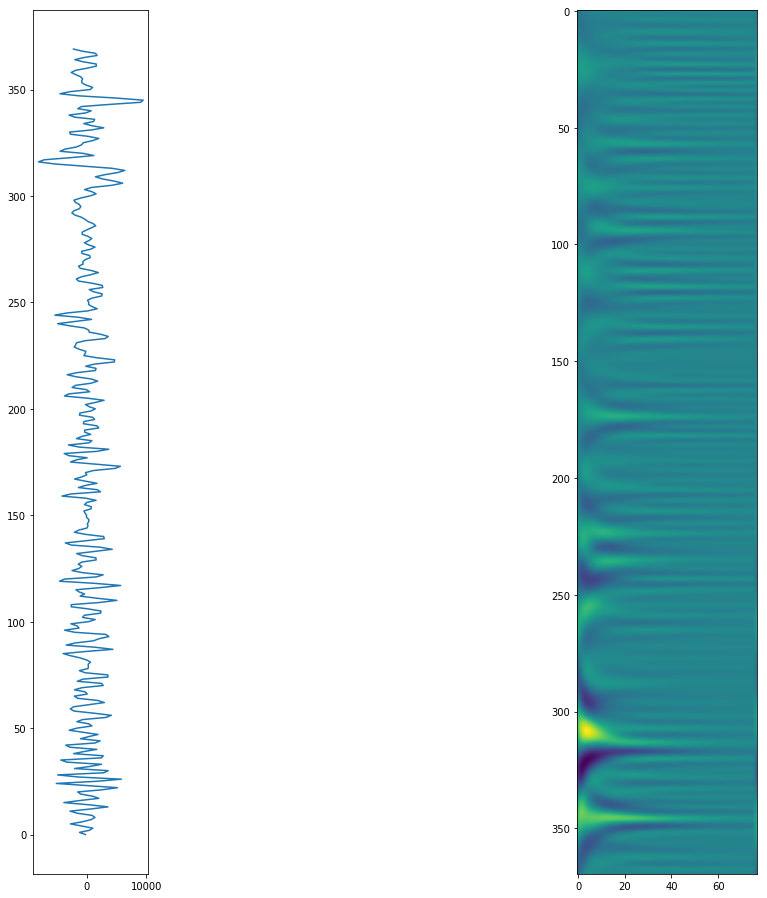

In [68]:
plt.figure()
ax = plt.axes((0,1,0.1,1))
plt.plot(trace, range(0,len(trace)))
ax = plt.axes((0.15,1,0.8,1))
plt.imshow(E, interpolation='bicubic')

In [70]:
volume = segyio.tools.cube(seismic_sgy)
print('volume', volume.shape)
cwt_cube = np.zeros((*volume.shape, len(Fc)))
shape = cwt_cube.shape
print('cwt_cube', shape)

for i in range(0, shape[0]):
    print(i)
    for x in range(0, shape[1]):
        trace = np.squeeze(volume[i,x,:])
        c = cwt(trace, ricker, widths)
        E = ricker_expansion(trace, Fc)
        cwt_cube[i, x, :, :] = E

volume (110, 81, 370)
cwt_cube (110, 81, 370, 77)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [71]:
np.save('f3sub_hack_cwt_cube.npy', cwt_cube)

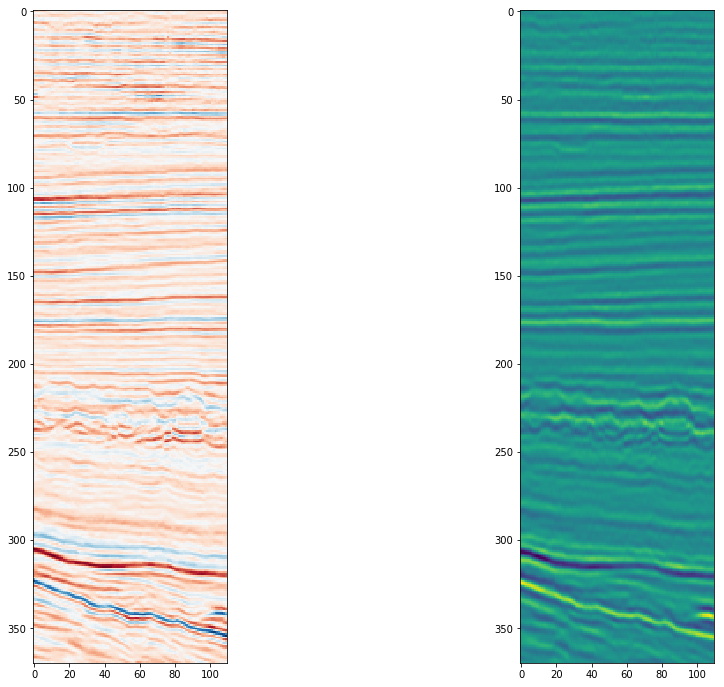

In [72]:
slice = volume[:,50,:]
hyperslice = cwt_cube[:,50,:,20]

plt.subplot(1,2,1)
plt.imshow(slice.T, cmap='RdBu')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(hyperslice).T)

